Global Power Plant Database

Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:

•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Dataset Link-
•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv



# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a regression and classification both type machine learning problem because the goal is to predict a continuous and discrete numeric output variable in this data set numerical data and categorical data is present

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
326,IND,India,KARUPPUR GT,IND0000184,119.8,11.1208,79.5287,Gas,NaN,NaN,...,2019.0,NaN,560.352000,620.207000,480.96700,469.440000,633.42000,NaN,Central Electricity Authority,NaN
316,IND,India,KALLADA,IND0000177,15.0,8.9553,77.0697,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,IND,India,GIRI BATA,IND0000132,60.0,30.5307,77.4968,Hydro,NaN,NaN,...,2019.0,NaN,198.820900,188.114700,139.89700,169.090300,213.37775,NaN,Central Electricity Authority,NaN
353,IND,India,KOLDAM,IND0000204,800.0,31.3820,76.8761,Hydro,NaN,NaN,...,2019.0,NaN,0.250000,2297.057000,3209.03420,3297.051900,2998.86035,NaN,Central Electricity Authority,NaN
439,IND,India,Lalpur Wind Farm,WRI1026345,50.4,22.1694,69.8270,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,IND,India,Belgaum Wind farm,WRI1026074,50.4,15.9349,74.7007,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,IND,India,KARAIKAL,IND0000180,32.5,10.9325,79.8216,Gas,NaN,NaN,...,2019.0,NaN,95.035579,212.919179,231.32471,212.377444,214.17000,NaN,Central Electricity Authority,NaN
541,IND,India,NIZAM SAGAR,IND0000306,10.0,18.2172,77.9576,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,IND,India,VIJAYWADA,IND0000500,1260.0,16.5984,80.5370,Coal,Oil,NaN,...,2019.0,NaN,8197.970000,8131.180000,7262.06000,6992.780000,6949.37000,NaN,Central Electricity Authority,NaN
160,IND,India,DAE RAJASTHAN,IND0000086,100.0,24.8747,75.6189,Nuclear,NaN,NaN,...,2019.0,NaN,NaN,0.000000,0.00000,0.000000,0.00000,NaN,Central Electricity Authority,NaN


# Cleaning the data

In [5]:
#checking the null value of  column of dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we observe that there is null value is present in  columns

In [6]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 10445


<Axes: >

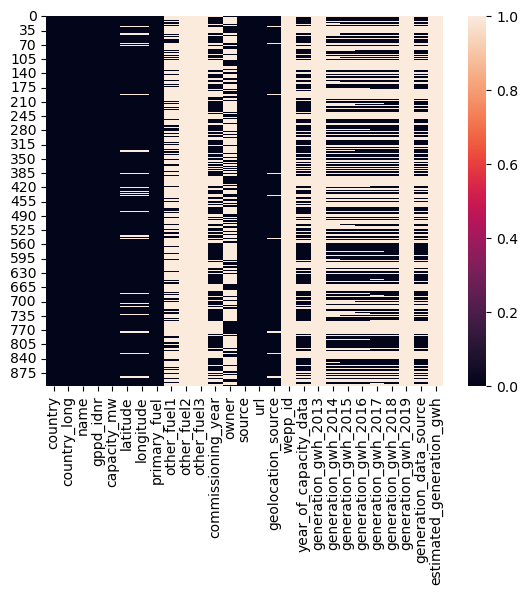

In [7]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is  null value  present in any columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

 we observe that there is null value present in many column,and all datatypes seem to object and float

# Exploratory Data Analysis(EDA)

In [9]:
#checking the shape of dataset
df.shape

(907, 27)

we observe that there 907row and 27 columns is present in this dataset

In [10]:
#checking the column of dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

there are 27 no of column is present out of which primary_fuel​ is our target 

In [11]:
# to convert index from row to column
df.columns.tolist()


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [12]:
#checking the types of column of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We observe there are  object type and float datatype are present

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


mostly all column have unique value in all column there  8 unique value present in target primary_fuel	

In [14]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

These are the value counts of all columns and we have seen there is  no white space are present

In [15]:
#checking the list of counts of target
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

appox all are unique value

In [16]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

there are 258 unique value are present in coal

In [17]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


Numerical columns: ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


There are 15 Numerical column are present and 12 Categorical columns also present

# Cleaning of data

In [18]:
#Dropping irrelevant features
df = df.drop(['country','country_long','gppd_idnr'], axis=1)

In [19]:
df = df.drop(['estimated_generation_gwh','url','name','geolocation_source'], axis=1)

In [20]:
df = df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019'], axis=1)

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,2016.0,NaN,Central Electricity Authority,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'generation_data_source']


Numerical columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [23]:
# Fill NaN values in the 'Categorical' column with 'Unknown'
df['other_fuel1'].fillna('Unknown', inplace=True)

In [24]:
df['other_fuel2'].fillna('Unknown', inplace=True)

In [25]:
df['owner'].fillna('Unknown', inplace=True)

In [26]:
df['source'].fillna('Unknown', inplace=True)

In [27]:
df['generation_data_source'].fillna('Unknown', inplace=True)

In [28]:
# Fill NaN values in the 'Categorical' column with 'mean'
df['latitude'].fillna(df['latitude'].mean(), inplace=True)

In [29]:
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [30]:
df["commissioning_year"].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

we observe that 2015 have highest count so we fill this column nan value with 2015

In [31]:
df['commissioning_year'].fillna(2015, inplace=True)

In [32]:
df["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

we observe that 2019 have highest count so we fill this column nan value with 2019

In [33]:
df['year_of_capacity_data'].fillna(2019, inplace=True)

In [34]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)

In [35]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2014'].mean(), inplace=True)

In [36]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)

In [37]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

In [38]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

In [39]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,Unknown,Unknown,2011.0,Solar Paces,National Renewable Energy Laboratory,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown
1,98.0,24.7663,74.6090,Coal,Unknown,Unknown,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown
2,39.2,21.9038,69.3732,Wind,Unknown,Unknown,2015.0,AES,CDM,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown
3,135.0,23.8712,91.3602,Gas,Unknown,Unknown,2004.0,Unknown,Central Electricity Authority,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,Unknown,2015.0,Unknown,Central Electricity Authority,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Unknown,2016.0,Unknown,Central Electricity Authority,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Unknown,Unknown,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown
904,25.5,15.2758,75.5811,Wind,Unknown,Unknown,2015.0,Unknown,CDM,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown
905,80.0,24.3500,73.7477,Coal,Unknown,Unknown,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,Unknown


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             907 non-null    object 
 5   other_fuel2             907 non-null    object 
 6   commissioning_year      907 non-null    float64
 7   owner                   907 non-null    object 
 8   source                  907 non-null    object 
 9   year_of_capacity_data   907 non-null    float64
 10  generation_gwh_2014     907 non-null    float64
 11  generation_gwh_2015     907 non-null    float64
 12  generation_gwh_2016     907 non-null    float64
 13  generation_gwh_2017     907 non-null    float64
 14  generation_gwh_2018     907 non-null    fl

In [41]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

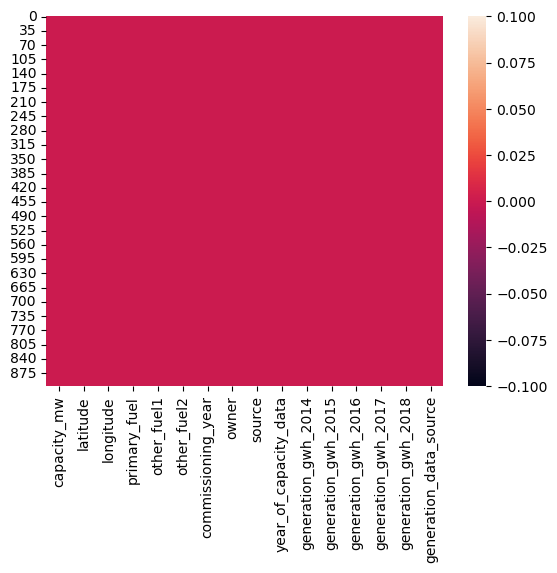

In [42]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan values are filled no nan is present

# Data visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


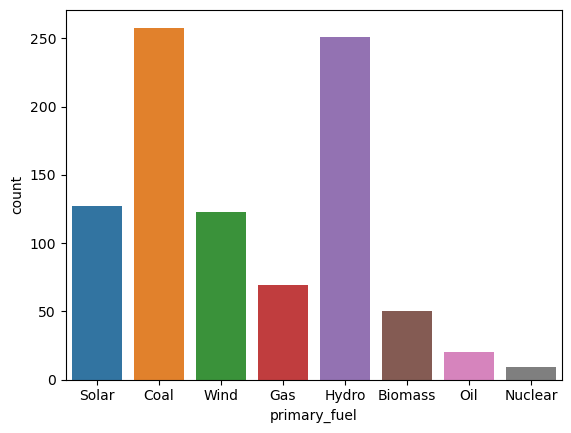

In [43]:
#visualizing the primary_fuel
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

We observe that coal is highly use as primary fuel

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


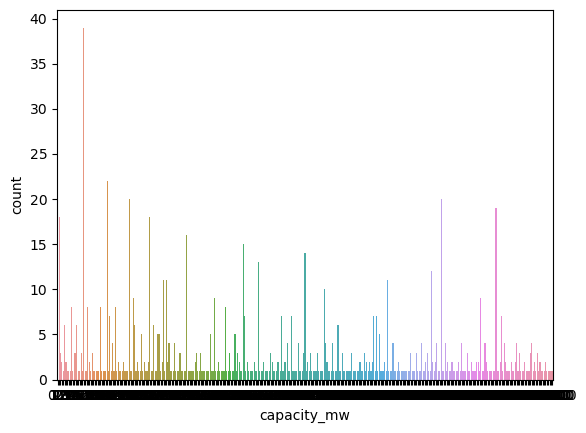

In [44]:
#visualizing the capacity_mw
ax=sns.countplot(x='capacity_mw',data=df)
print(df['capacity_mw'].value_counts())

Unknown         709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


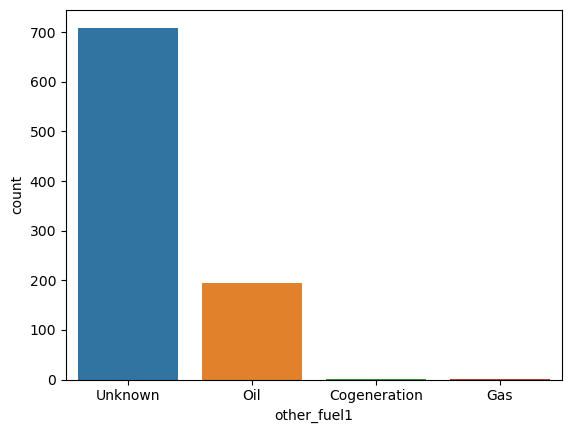

In [45]:
#visualizing the other_fuel1
ax=sns.countplot(x='other_fuel1',data=df)
print(df['other_fuel1'].value_counts())

Unknown    906
Oil          1
Name: other_fuel2, dtype: int64


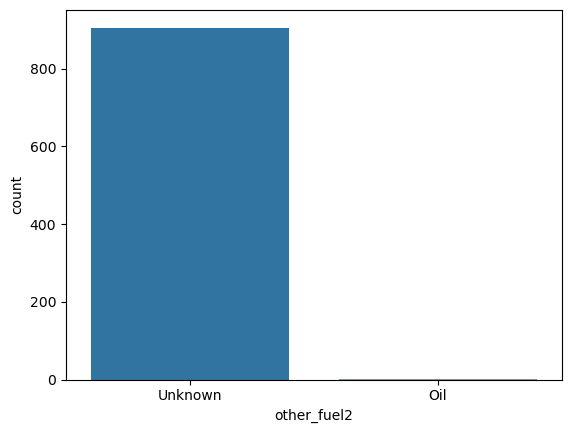

In [46]:
#visualizing the other_fuel1
ax=sns.countplot(x='other_fuel2',data=df)
print(df['other_fuel2'].value_counts())

[Text(0.5, 1.0, 'Effect of primary fuel on capacity')]

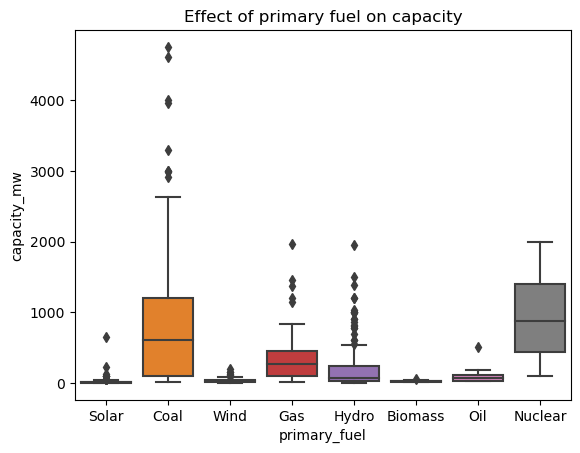

In [47]:
bp = sns.boxplot(x='primary_fuel',y='capacity_mw', data=df)
bp.set(title="Effect of primary fuel on capacity")

[Text(0.5, 1.0, 'Effect of other_fuel2 on capacity')]

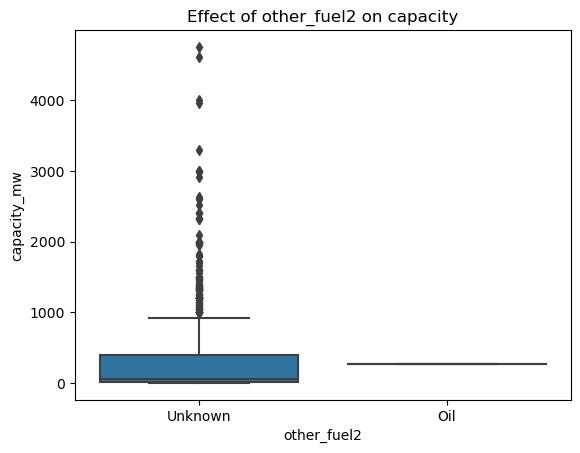

In [48]:
bp = sns.boxplot(x='other_fuel2',y='capacity_mw', data=df)
bp.set(title="Effect of other_fuel2 on capacity")

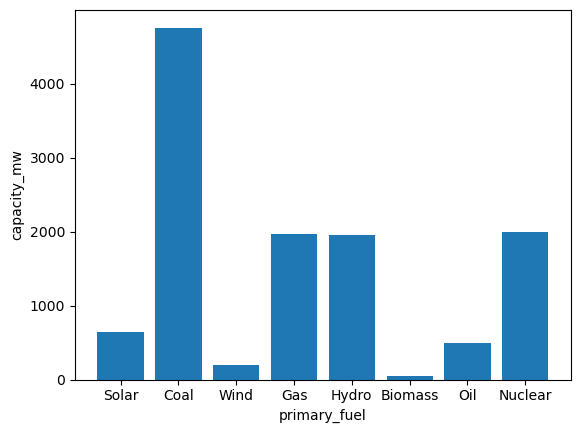

In [49]:
plt.bar(df['primary_fuel'], df['capacity_mw'])
plt.xlabel('primary_fuel')
plt.ylabel('capacity_mw')
plt.show()

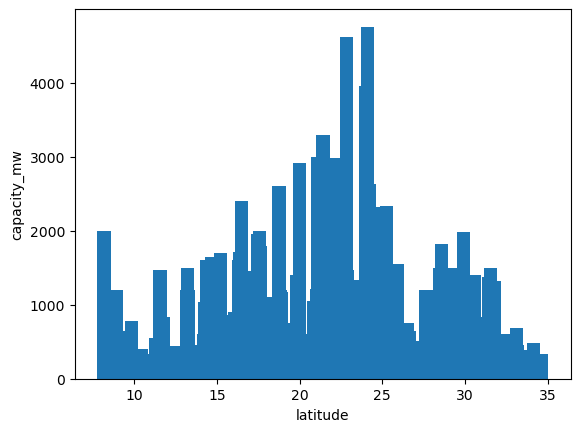

In [50]:
plt.bar(df['latitude'], df['capacity_mw'])
plt.xlabel('latitude')
plt.ylabel('capacity_mw')
plt.show()

We observe that at 23 to 24 latitute high capacity mw is present

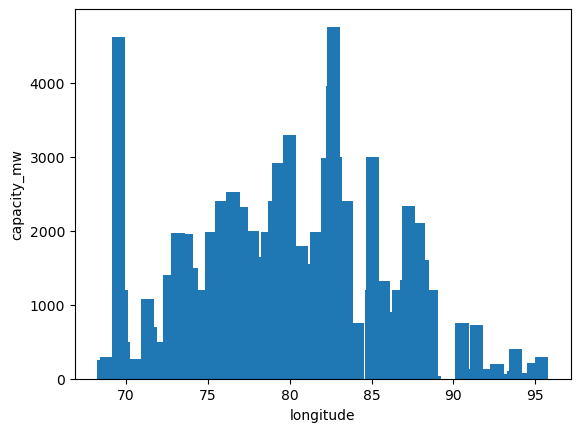

In [52]:
plt.bar(df['longitude'], df['capacity_mw'])
plt.xlabel('longitude')
plt.ylabel('capacity_mw')
plt.show()

we observe that as well as longitude increase capacity mw will reduce

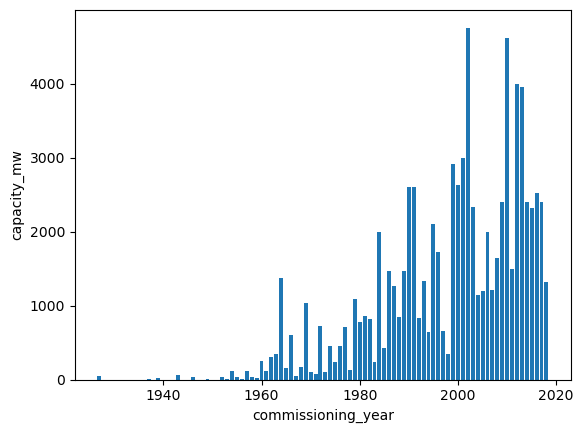

In [53]:
plt.bar(df['commissioning_year'], df['capacity_mw'])
plt.xlabel('commissioning_year')
plt.ylabel('capacity_mw')
plt.show()

we observe that in 2000 high capacity of mw is seened

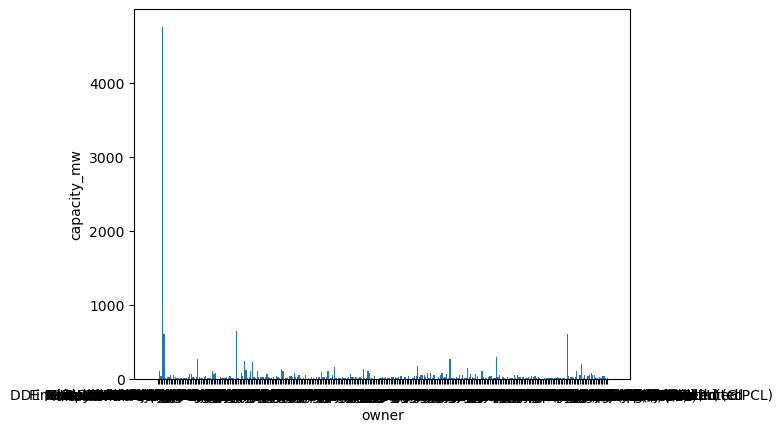

In [54]:
plt.bar(df['owner'], df['capacity_mw'])
plt.xlabel('owner')
plt.ylabel('capacity_mw')
plt.show()

# Preprocessing

In [55]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['primary_fuel']

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [56]:
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['other_fuel1']

0      3
1      3
2      3
3      3
4      2
      ..
902    2
903    3
904    3
905    3
906    3
Name: other_fuel1, Length: 907, dtype: int32

In [57]:
df['other_fuel2']=le.fit_transform(df['other_fuel2'])
df['other_fuel2']

0      1
1      1
2      1
3      1
4      1
      ..
902    1
903    1
904    1
905    1
906    1
Name: other_fuel2, Length: 907, dtype: int32

In [58]:
df['owner']=le.fit_transform(df['owner'])
df['owner']

0      229
1      258
2        2
3      260
4      260
      ... 
902    260
903    114
904    260
905     91
906    280
Name: owner, Length: 907, dtype: int32

In [59]:
df['source']=le.fit_transform(df['source'])
df['source']

0      109
1      174
2       21
3       22
4       22
      ... 
902     22
903     77
904     21
905     59
906     21
Name: source, Length: 907, dtype: int32

In [60]:
df['generation_data_source']=le.fit_transform(df['generation_data_source'])
df['generation_data_source']

0      1
1      1
2      1
3      0
4      0
      ..
902    0
903    1
904    1
905    1
906    1
Name: generation_data_source, Length: 907, dtype: int32

In [61]:
df['generation_data_source']=le.fit_transform(df['generation_data_source'])
df['generation_data_source']

0      1
1      1
2      1
3      0
4      0
      ..
902    0
903    1
904    1
905    1
906    1
Name: generation_data_source, Length: 907, dtype: int64

We observe that all the categorical column will converted in numerical column

# Description of data set

In [62]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,2004.594267,215.041896,43.847850,2019.0,2431.823590,2430.150179,2467.936859,2547.759305,2600.804099,0.504961
std,590.085456,6.079148,4.812291,2.280652,0.429348,0.033204,15.734928,76.352936,44.642818,0.0,2665.338608,2859.349695,2877.890004,2921.502193,3030.808041,0.500251
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,3.000000,1.000000,1998.000000,188.500000,22.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,59.200000,21.281800,76.979200,3.000000,3.000000,1.000000,2014.000000,260.000000,22.000000,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,1.000000
75%,385.250000,25.176450,79.206100,6.000000,3.000000,1.000000,2015.000000,260.000000,29.500000,2019.0,2431.823590,2431.823590,2467.936859,2547.759305,2600.804099,1.000000
max,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,2018.000000,280.000000,190.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately high in capacity_mw and source it means that data set is skewed in  right direction and it is not normally distributed  columns which means the data is  skewed  in these columns 
    
    3.There is other_fuel1  columns in which mean value is less than median(50%) hence there  left skewed 
    
    4.There is  major difference beteen 75% and max in capacity_mw it means there is outliers are present in these columns
    
    5.In this discription min,std and 25% detail also found

we observe that average price is normaly distributed

# checking skewness

In [63]:
#checking skewness
df.skew()

capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1               -1.626786
other_fuel2              -30.116441
commissioning_year        -1.714873
owner                     -1.485398
source                     1.827373
year_of_capacity_data      0.000000
generation_gwh_2014        5.035446
generation_gwh_2015        5.362109
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source    -0.019880
dtype: float64

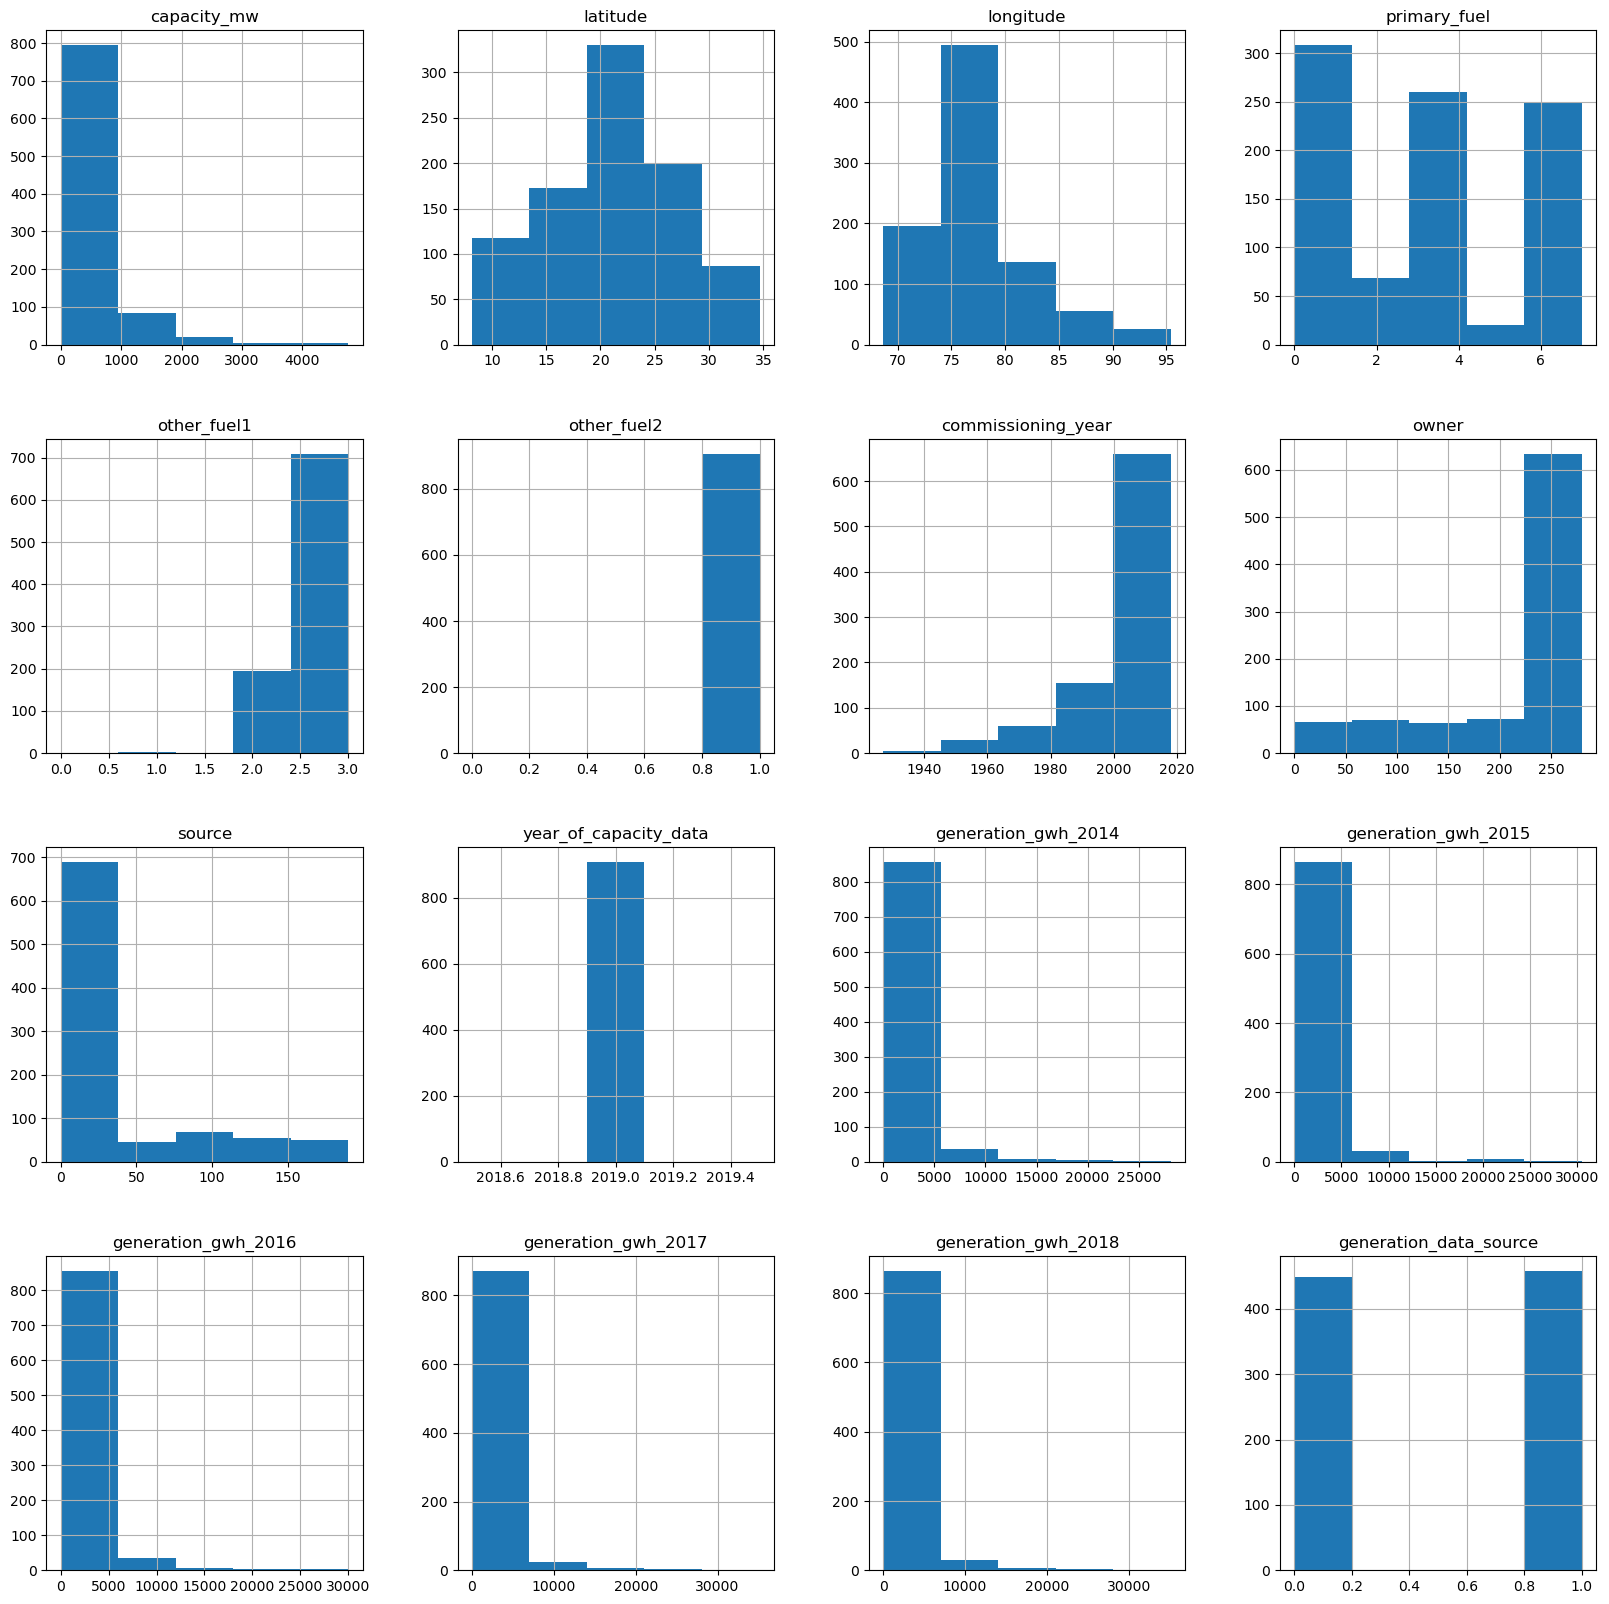

In [64]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [65]:
df['capacity_mw'] = np.cbrt(df['capacity_mw'])

In [66]:
df['longitude'] = np.cbrt(df['longitude'])

In [67]:
df['other_fuel2'] = np.cbrt(df['other_fuel2'])

In [68]:
df['generation_gwh_2014'] = np.cbrt(df['generation_gwh_2014'])

In [69]:
df['generation_gwh_2015'] = np.cbrt(df['generation_gwh_2015'])

In [70]:
df['generation_gwh_2016'] = np.cbrt(df['generation_gwh_2016'])

In [71]:
df['generation_gwh_2017'] = np.cbrt(df['generation_gwh_2017'])

In [72]:
df['source'] = np.cbrt(df['source'])

In [73]:
#checking skewness
df.skew()

capacity_mw                1.013378
latitude                  -0.149698
longitude                  1.002134
primary_fuel               0.472251
other_fuel1               -1.626786
other_fuel2              -30.116441
commissioning_year        -1.714873
owner                     -1.485398
source                     1.323520
year_of_capacity_data      0.000000
generation_gwh_2014       -0.371187
generation_gwh_2015       -0.271435
generation_gwh_2016       -0.279323
generation_gwh_2017       -0.331857
generation_gwh_2018        4.937907
generation_data_source    -0.019880
dtype: float64

In [74]:
df.groupby('primary_fuel').mean()

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
primary_fuel,,,,,,,,,,,,,,,
0,2.675812,17.460458,4.229658,3.000000,1.000000,2015.000000,159.280000,4.588490,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.000000
1,7.928393,21.648803,4.296533,2.259690,0.996124,2008.422481,222.511628,3.133127,2019.0,13.935154,13.798999,14.140182,14.272221,4375.594443,0.267442
2,6.404004,20.066779,4.276731,2.898551,1.000000,2004.594203,244.623188,3.053508,2019.0,8.584815,8.946830,8.271124,8.355455,1126.304831,0.159420
3,4.623382,22.182426,4.284456,3.000000,1.000000,1988.709163,260.000000,2.802039,2019.0,9.728035,9.331356,9.249824,9.146695,1242.399004,0.270916
4,9.298590,18.081478,4.237692,3.000000,1.000000,1996.555556,260.000000,2.932819,2019.0,15.821086,14.114078,13.174834,13.268997,4090.783789,0.111111
5,4.068609,17.894758,4.221034,2.800000,1.000000,2002.750000,211.050000,3.442266,2019.0,7.515498,6.885817,6.445221,8.960653,1170.524212,0.450000
6,2.154827,24.004121,4.205654,3.000000,1.000000,2014.897638,135.433071,4.422231,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.000000
7,2.888660,18.264626,4.208610,3.000000,1.000000,2015.000000,193.260163,2.758924,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.000000


we observe that in 2019 highest capacity_mw is seen where latitude is 18 and primary fuel as coal have high capacity of plant

In [75]:
df.groupby('capacity_mw').mean()

,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,,,,,,,,,,,,,,,
0.000000,12.849100,4.266720,6.000000,3.0,1.0,2015.0,246.000000,5.495865,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.0
1.000000,25.236700,4.203748,6.055556,3.0,1.0,2015.0,156.000000,4.339779,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.0
1.144714,10.843367,4.261018,7.000000,3.0,1.0,2015.0,242.666667,2.758924,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.0
1.193483,13.667050,4.236145,7.000000,3.0,1.0,2015.0,257.500000,2.758924,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.0
1.216440,30.461300,4.210006,6.000000,3.0,1.0,2015.0,226.000000,5.371685,2019.0,13.447576,13.447576,13.513816,13.657969,2600.804099,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.888056,21.412900,4.308279,1.000000,2.0,1.0,2013.0,260.000000,2.802039,2019.0,24.933691,26.667153,25.542796,25.511593,20518.000000,0.0
15.820920,23.978400,4.355535,1.000000,2.0,1.0,2013.0,260.000000,2.802039,2019.0,24.699878,30.843470,30.246488,31.040876,30905.000000,0.0
15.874011,22.815800,4.112003,1.000000,2.0,1.0,2012.0,260.000000,2.802039,2019.0,29.044324,28.715813,29.357834,29.082996,24752.000000,0.0


we observe that maximum bags are conventional type and with high percentage of volume

# Correlation Matrix and Heatmap

In [76]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.071297,0.287408,-0.500583,-0.672452,-0.013571,-0.082464,3.987115e-01,-3.476832e-01,NaN,0.217743,0.217770,0.247026,0.251861,4.958226e-01,-7.143461e-01
latitude,0.071297,1.000000,0.028427,-0.010204,-0.032790,0.032885,0.034519,1.758712e-03,5.526344e-02,NaN,0.065087,0.056005,0.072445,0.047354,3.132625e-02,-8.690977e-02
longitude,0.287408,0.028427,1.000000,-0.354780,-0.278873,0.005000,-0.162124,2.614583e-01,-2.348145e-01,NaN,-0.093962,-0.104222,-0.063947,-0.083297,3.885487e-02,-4.128302e-01
primary_fuel,-0.500583,-0.010204,-0.354780,1.000000,0.476410,0.032156,0.164947,-2.429793e-01,4.307828e-02,NaN,0.013619,0.016474,0.004585,0.015603,-1.369831e-01,4.823393e-01
other_fuel1,-0.672452,-0.032790,-0.278873,0.476410,1.000000,0.215024,-0.019109,-3.057704e-01,2.499513e-01,NaN,-0.188304,-0.171269,-0.205347,-0.216681,-3.655638e-01,5.241834e-01
other_fuel2,-0.013571,0.032885,0.005000,0.032156,0.215024,1.000000,0.011818,-1.957301e-02,1.599991e-02,NaN,-0.005090,-0.005280,0.001983,0.003475,1.512784e-02,3.355409e-02
commissioning_year,-0.082464,0.034519,-0.162124,0.164947,-0.019109,0.011818,1.000000,-3.884704e-01,3.167273e-01,NaN,0.264281,0.280378,0.310595,0.282461,1.442491e-01,3.900756e-01
owner,0.398712,0.001759,0.261458,-0.242979,-0.305770,-0.019573,-0.388470,1.000000e+00,-1.933034e-01,NaN,-0.183271,-0.194317,-0.195987,-0.195747,-1.138981e-16,-5.833272e-01
source,-0.347683,0.055263,-0.234815,0.043078,0.249951,0.016000,0.316727,-1.933034e-01,1.000000e+00,NaN,0.149814,0.158844,0.160209,0.160013,-2.276369e-17,4.768394e-01
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
correlations = df.corr()['primary_fuel'].sort_values(ascending=False)
print(correlations)

primary_fuel              1.000000
generation_data_source    0.482339
other_fuel1               0.476410
commissioning_year        0.164947
source                    0.043078
other_fuel2               0.032156
generation_gwh_2015       0.016474
generation_gwh_2017       0.015603
generation_gwh_2014       0.013619
generation_gwh_2016       0.004585
latitude                 -0.010204
generation_gwh_2018      -0.136983
owner                    -0.242979
longitude                -0.354780
capacity_mw              -0.500583
year_of_capacity_data          NaN
Name: primary_fuel, dtype: float64


<Axes: >

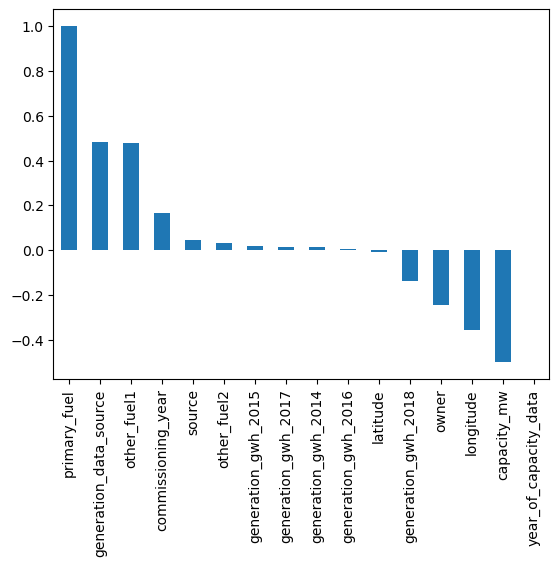

In [78]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as AveragePrice,Total Volume,4046, 4225,4770,Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region are  positively correlated correlated, barplot show value between +0.2

<Axes: >

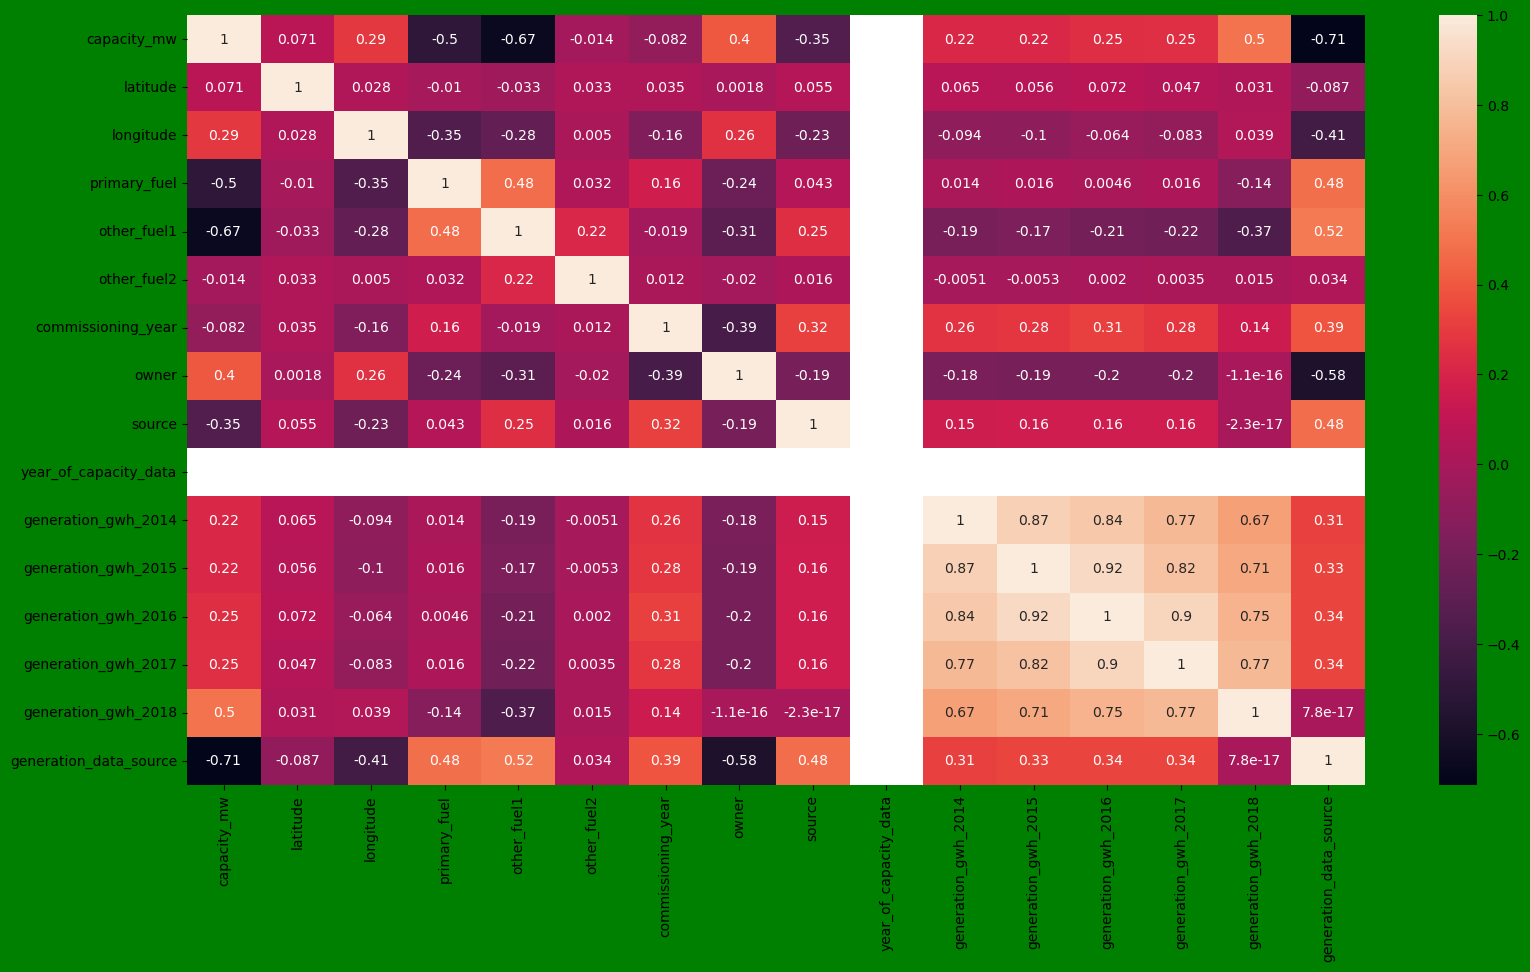

In [79]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as 4046,4225,4770,total bag is highly correlated with  Total Volume up td 0.91 and 4046,4225,4770 also high correlated with three type of bag so we will drop high correlated features  we have observe that type ,year, region are negatively correlated . so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [80]:
print(abs(correlations) > 0.2)

primary_fuel               True
generation_data_source     True
other_fuel1                True
commissioning_year        False
source                    False
other_fuel2               False
generation_gwh_2015       False
generation_gwh_2017       False
generation_gwh_2014       False
generation_gwh_2016       False
latitude                  False
generation_gwh_2018       False
owner                      True
longitude                  True
capacity_mw                True
year_of_capacity_data     False
Name: primary_fuel, dtype: bool


From all the values, we are selecting 4046,4225,4770,total bag in order to study them better and see the distribution of values that separate the different qualities these are negatively effect region

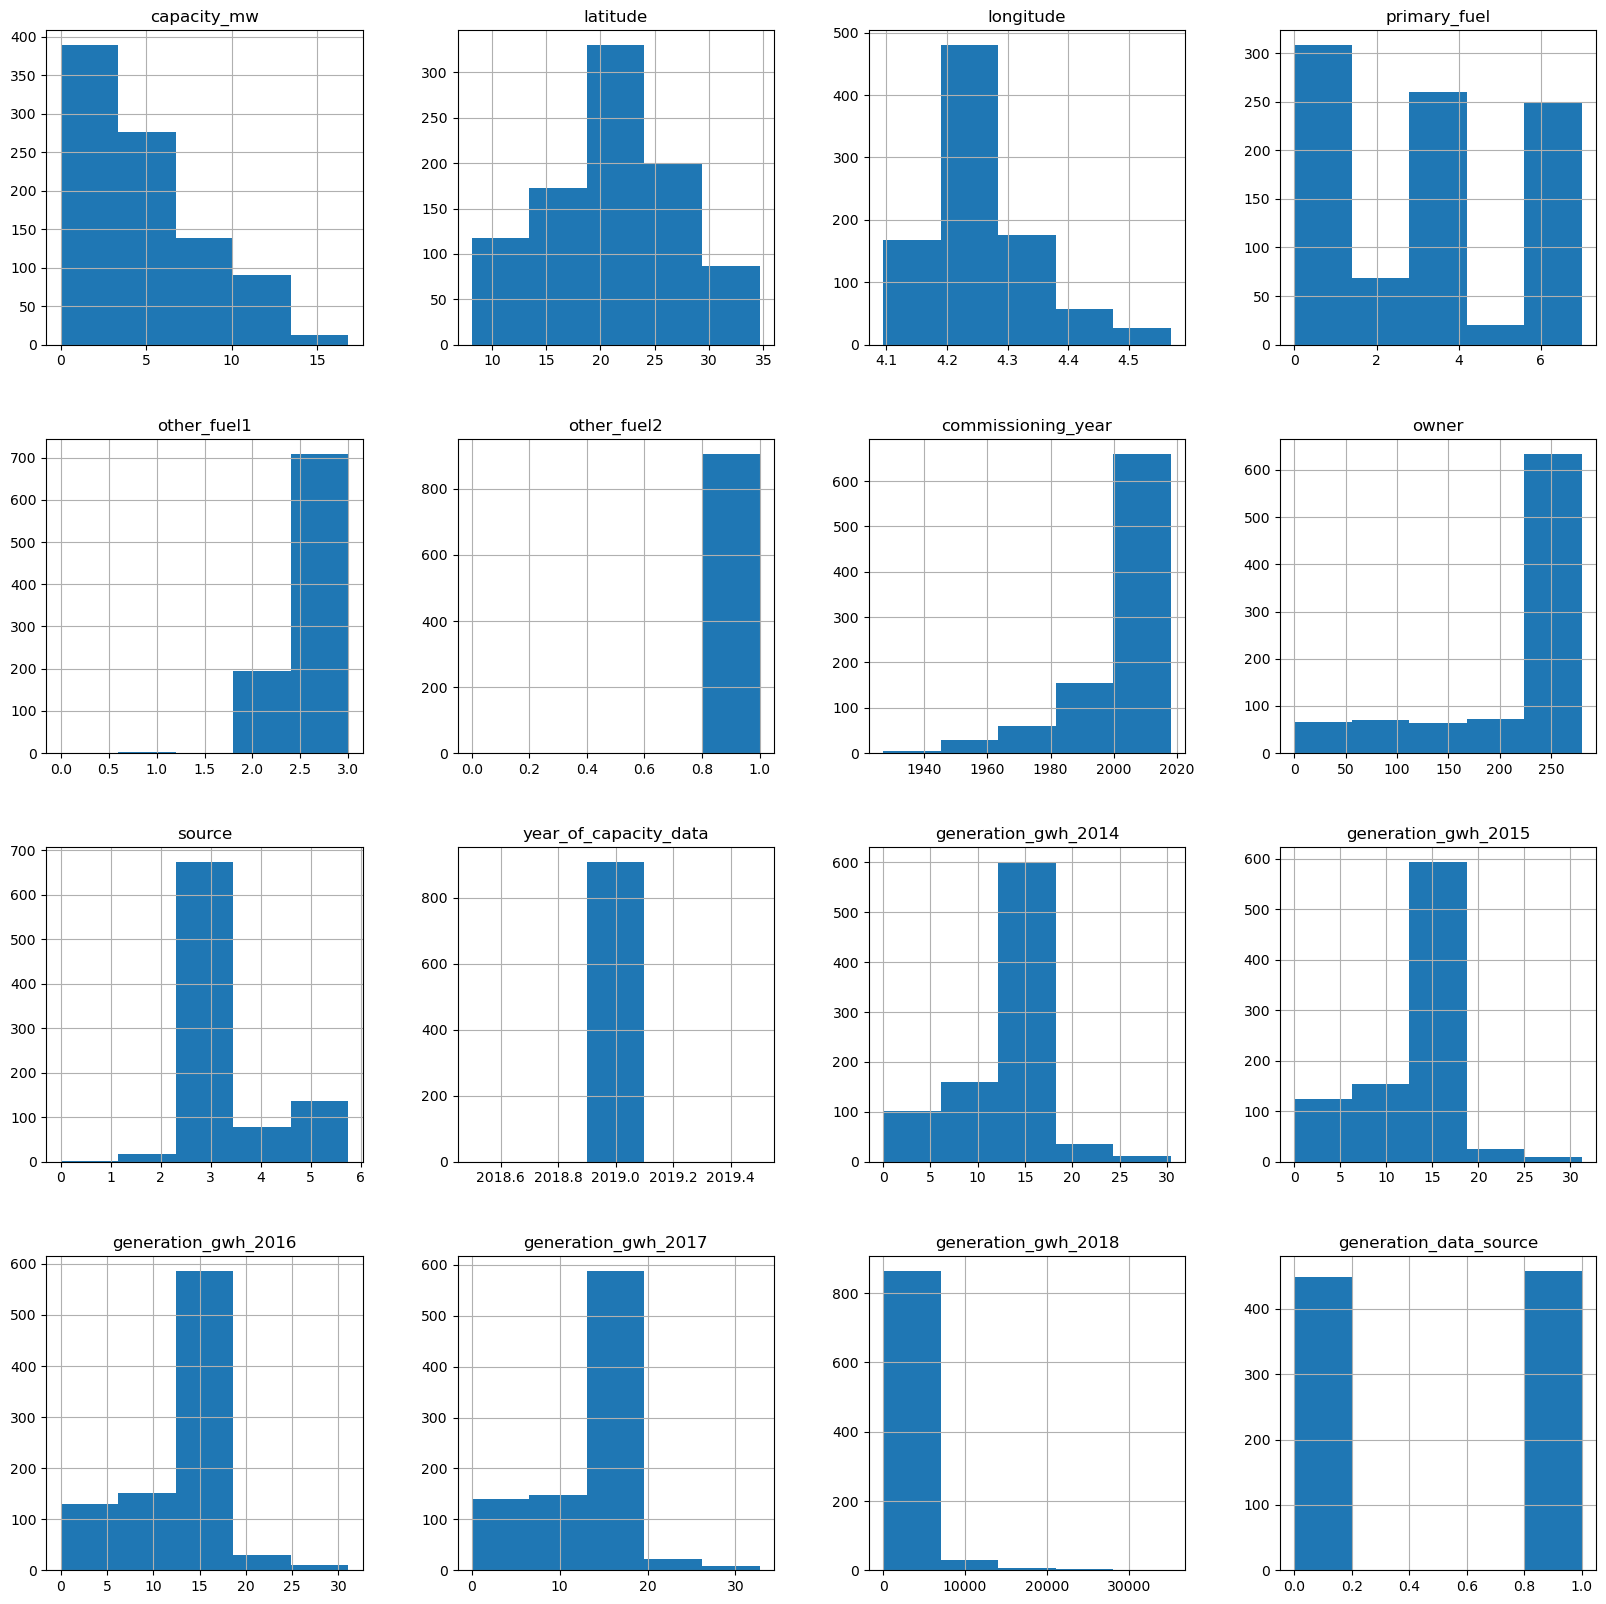

In [81]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe now all features are normaly distributed

In [82]:
df = df.drop(['generation_gwh_2015'], axis=1)

In [83]:
df = df.drop(['generation_gwh_2016'], axis=1)

In [84]:
df = df.drop(['year_of_capacity_data'], axis=1)

# Feature Selection

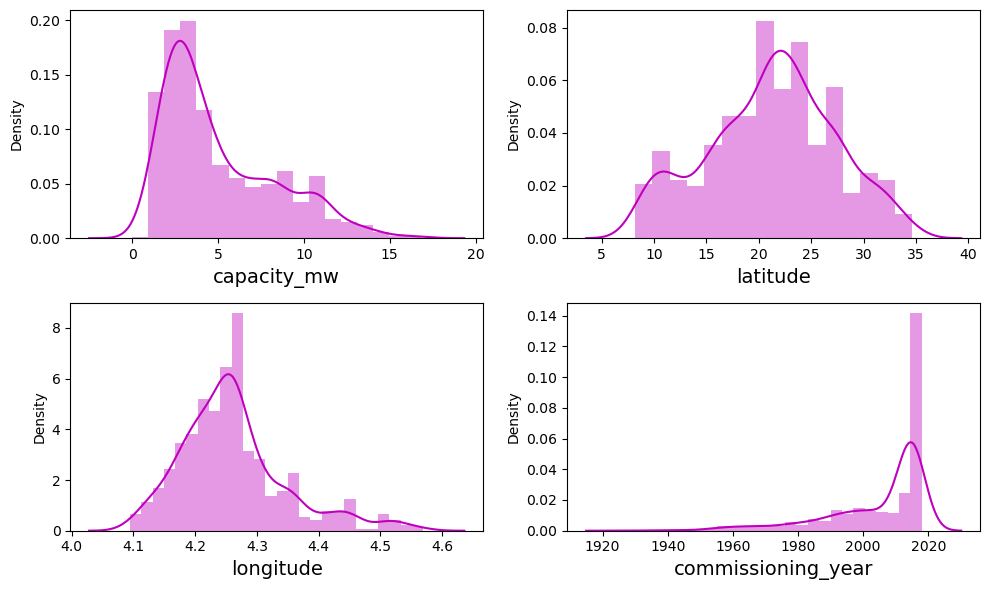

In [85]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we obseve that all featutes are normaly distributed

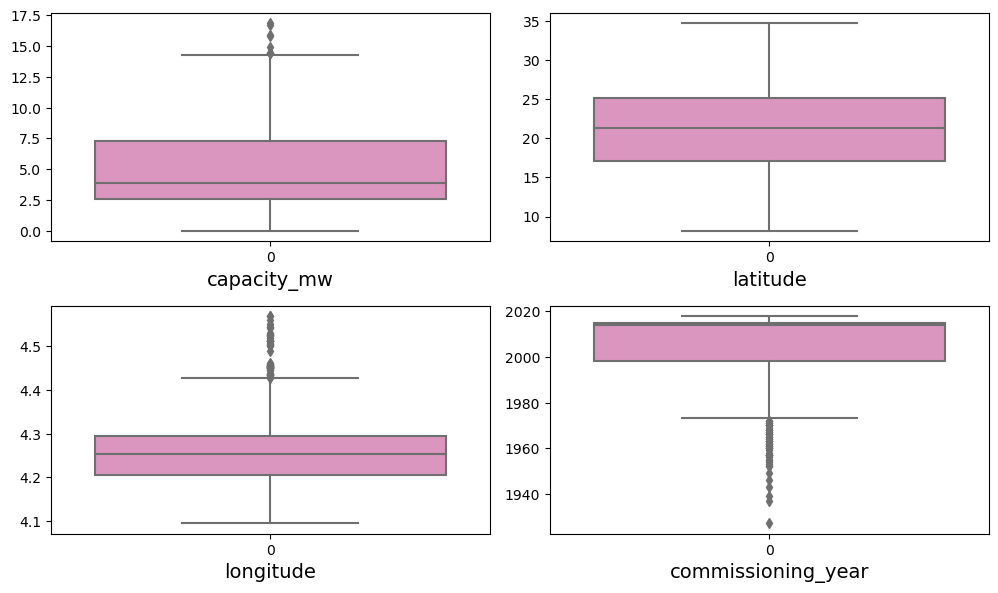

In [86]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

In [87]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1.357209,28.1839,4.183928,6,3,1.0,2011.0,229,4.776856,13.447576,13.657969,2600.804099,1
1,4.610436,24.7663,4.209822,1,3,1.0,2015.0,258,5.582770,13.447576,13.657969,2600.804099,1
2,3.396999,21.9038,4.108947,7,3,1.0,2015.0,2,2.758924,13.447576,13.657969,2600.804099,1
3,5.129928,23.8712,4.503868,2,3,1.0,2004.0,260,2.802039,8.516872,8.723154,626.239128,0
4,12.164404,21.9603,4.351694,1,2,1.0,2015.0,260,2.802039,14.479241,17.528476,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,11.696071,16.2949,4.260882,1,2,1.0,2016.0,260,2.802039,13.447576,9.529548,686.500000,0
903,1.442250,12.8932,4.275677,6,3,1.0,2015.0,114,4.254321,13.447576,13.657969,2600.804099,1
904,2.943383,15.2758,4.228027,7,3,1.0,2015.0,260,2.758924,13.447576,13.657969,2600.804099,1
905,4.308869,24.3500,4.193560,1,3,1.0,2015.0,91,3.892996,13.447576,13.657969,2600.804099,1


we observe now all features are  normaly distributed 

# Split data into features and labels for classification

In [88]:
x_classification = df.drop(['primary_fuel'], axis=1)
y_classification = df['primary_fuel']

# Feature Scaling using Standard Scalarization

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_classification=pd.DataFrame(scaler.fit_transform(x_classification), columns = x_classification.columns)
x_classification

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.126096,1.149805,-0.892687,0.519008,0.033223,0.407327,0.182911,1.640259,0.311080,0.332256,1.501244e-16,0.990126
1,-0.132660,0.587311,-0.593158,0.519008,0.033223,0.661679,0.562936,2.506179,0.311080,0.332256,1.501244e-16,0.990126
2,-0.503206,0.116179,-1.760007,0.519008,0.033223,0.661679,-2.791765,-0.527920,0.311080,0.332256,1.501244e-16,0.990126
3,0.025977,0.439989,2.808168,0.519008,0.033223,-0.037788,0.589144,-0.481595,-0.810291,-0.702510,-6.518573e-01,-1.009973
4,2.174090,0.125479,1.047925,-1.811388,0.033223,0.661679,0.589144,-0.481595,0.545707,1.143851,1.544399e+00,-1.009973
...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.031075,-0.806975,-0.002532,-1.811388,0.033223,0.725267,0.589144,-0.481595,0.311080,-0.533420,-6.319636e-01,-1.009973
903,-1.100127,-1.366853,0.168603,0.519008,0.033223,0.661679,-1.324083,1.078818,0.311080,0.332256,1.501244e-16,0.990126
904,-0.641727,-0.974707,-0.382577,0.519008,0.033223,0.661679,0.589144,-0.527920,0.311080,0.332256,1.501244e-16,0.990126
905,-0.224749,0.518793,-0.781270,0.519008,0.033223,0.661679,-1.625482,0.690591,0.311080,0.332256,1.501244e-16,0.990126


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [90]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_classification.values, i)
                    for i in range (len(x_classification.columns))]
vif["Features"] = x_classification.columns
vif

,VIF values,Features
0,5.787475,capacity_mw
1,1.056508,latitude
2,1.235495,longitude
3,2.193136,other_fuel1
4,1.092232,other_fuel2
5,1.500448,commissioning_year
6,1.648552,owner
7,1.392952,source
8,2.818336,generation_gwh_2014
9,4.798623,generation_gwh_2017


we observe by checking vif values the feature  causing multicollineraity problem.There is no any column have 
vif value is more than 10 so there is no multicollineraity problem

In [91]:
y_classification.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# oversampling

In [92]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_classification,y_classification)

In [93]:
y1.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [95]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_classification_train, y_classification_train)
    pred = lr.predict(x_classification_test)
    acc = r2_score(y_classification_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.5150515212627566 on random_state  152


# Creating train test split

In [96]:
x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [97]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [98]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_classification_train, y_classification_train)
predRFC= RFC.predict(x_classification_test)
print(accuracy_score(y_classification_test, predRFC)) 
print(confusion_matrix(y_classification_test, predRFC)) 
print(classification_report(y_classification_test, predRFC))

0.9267399267399268
[[12  0  0  0  0  0  1  0]
 [ 1 76  0  0  0  0  0  0]
 [ 0  5  8  2  0  2  0  0]
 [ 0  0  0 72  0  1  0  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  2  0  0  0  3  0  0]
 [ 0  3  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.99      0.93        77
           2       1.00      0.47      0.64        17
           3       0.95      0.99      0.97        73
           4       0.00      0.00      0.00         3
           5       0.43      0.60      0.50         5
           6       0.97      0.93      0.95        42
           7       1.00      1.00      1.00        43

    accuracy                           0.93       273
   macro avg       0.77      0.74      0.74       273
weighted avg       0.92      0.93      0.92       273



we observe that Random Forest Clssifier accuracy 93.0%

# support vector classifier

In [99]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_classification_train, y_classification_train)
predsvc= svc.predict(x_classification_test)
print(accuracy_score(y_classification_test, predsvc)) 
print(confusion_matrix(y_classification_test, predsvc)) 
print(classification_report(y_classification_test, predsvc))

0.8681318681318682
[[13  0  0  0  0  0  0  0]
 [ 3 72  0  0  0  0  1  1]
 [ 2  4  3  7  0  0  0  1]
 [ 0  0  0 73  0  0  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 5  3  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  1 42]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        13
           1       0.90      0.94      0.92        77
           2       1.00      0.18      0.30        17
           3       0.86      1.00      0.92        73
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         5
           6       0.94      0.79      0.86        42
           7       0.93      0.98      0.95        43

    accuracy                           0.87       273
   macro avg       0.77      0.65      0.64       273
weighted avg       0.87      0.87      0.85       273



we observe that support vector classifier accuracy 86.81%

# ExtraTreeClassifier

In [100]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_classification_train, y_classification_train)
predET= ET.predict(x_classification_test)
print(accuracy_score(y_classification_test, predET)) 
print(confusion_matrix(y_classification_test, predET)) 
print(classification_report(y_classification_test, predET))

0.7838827838827839
[[ 5  2  0  0  0  0  3  3]
 [ 4 67  3  3  0  0  0  0]
 [ 1  4  6  4  0  1  0  1]
 [ 0  0  6 63  0  4  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 0  1  0  1  0  3  0  0]
 [ 2  2  2  0  1  0 33  2]
 [ 0  0  0  0  0  1  6 36]]
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.88      0.87      0.88        77
           2       0.35      0.35      0.35        17
           3       0.86      0.86      0.86        73
           4       0.50      0.33      0.40         3
           5       0.33      0.60      0.43         5
           6       0.79      0.79      0.79        42
           7       0.86      0.84      0.85        43

    accuracy                           0.78       273
   macro avg       0.62      0.63      0.62       273
weighted avg       0.79      0.78      0.79       273



we observe that support vector classifier accuracy 83.15%

# LogisticRegression

In [101]:
# checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_classification_train, y_classification_train)
predLR= LR.predict(x_classification_test)
print(accuracy_score(y_classification_test, predLR)) 
print(confusion_matrix(y_classification_test, predLR)) 
print(classification_report(y_classification_test, predLR))


0.8754578754578755
[[12  0  0  0  0  0  1  0]
 [ 2 74  0  0  0  0  0  1]
 [ 2  4  5  5  0  0  0  1]
 [ 0  0  2 71  0  0  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 1  1  0  3  0  0  0  0]
 [ 3  3  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  3 40]]
              precision    recall  f1-score   support

           0       0.60      0.92      0.73        13
           1       0.90      0.96      0.93        77
           2       0.71      0.29      0.42        17
           3       0.88      0.97      0.92        73
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         5
           6       0.90      0.86      0.88        42
           7       0.95      0.93      0.94        43

    accuracy                           0.88       273
   macro avg       0.74      0.66      0.66       273
weighted avg       0.86      0.88      0.86       273



we observe that Logistic Regression  accuracy 87.54%

# Cross Validation Score

In [102]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5

cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy

for regression- deafult scoring parameter is - r2 score

In [104]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predRFC) - score.mean())

[0.85714286 0.9010989  0.87292818 0.86187845 0.90055249]
0.8787201748527714
Difference between Accuracy score and cross validation score is - 0.04801975188715535


In [105]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predsvc) - score.mean())

[0.78571429 0.82417582 0.83425414 0.8121547  0.80662983]
0.8125857567846518
Difference between Accuracy score and cross validation score is - 0.05554611134721632


In [106]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predET) - score.mean())

[0.70879121 0.78021978 0.82872928 0.73480663 0.80110497]
0.7707303745977778
Difference between Accuracy score and cross validation score is - 0.01315240928500605


In [107]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predLR) - score.mean())

[0.74175824 0.7967033  0.84530387 0.80662983 0.79558011]
0.7971950701232469
Difference between Accuracy score and cross validation score is - 0.0782628053346286


Random Forest Classifier  is our best model as the difference between accuracy score and cross validation score
is =0.042855119098212935 and this is least out of all

finaly we observe that Random Forest Classifier is our best model

# Hyper Parameter Tuning

In [108]:
# Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,200],
            'criterion':['gini','entropy'],
            'max_depth':[1,2],
            'min_samples_leaf':[1,2],
            'max_features':['sqrt','log2']}


In [109]:
GCV=GridSearchCV(RandomForestClassifier(),parameters, cv =5)


In [110]:
GCV.fit(x_classification_train,y_classification_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]})

In [111]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [112]:
Final_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 2, min_samples_leaf = 2, max_features = 'sqrt')
Final_model.fit(x_classification_train,y_classification_train)
pred = Final_model.predict(x_classification_test)
acc = accuracy_score(y_classification_test, pred)
print(acc*100)

79.12087912087912


# Saving the model

In [113]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Second_Phase_Evaluation_Projects1_Global_Power_Plant_Primary_Fuel_Prediction_Project_Analysis.pkl")

['Second_Phase_Evaluation_Projects1_Global_Power_Plant_Primary_Fuel_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [114]:
# first we load the saved model and get prediction
model = joblib.load("Second_Phase_Evaluation_Projects1_Global_Power_Plant_Primary_Fuel_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_classification_test)
prediction

array([1, 1, 3, 1, 1, 7, 6, 3, 3, 6, 7, 3, 7, 1, 3, 7, 7, 7, 3, 7, 7, 3,
       6, 3, 1, 3, 1, 6, 1, 6, 3, 1, 1, 1, 3, 3, 3, 7, 1, 3, 3, 6, 1, 7,
       3, 1, 3, 6, 7, 6, 3, 6, 6, 6, 3, 3, 3, 3, 7, 1, 3, 3, 7, 6, 3, 6,
       3, 7, 6, 7, 1, 3, 3, 6, 7, 1, 6, 1, 3, 1, 1, 3, 7, 3, 3, 6, 6, 6,
       3, 3, 1, 1, 3, 3, 3, 3, 1, 6, 6, 1, 6, 3, 1, 3, 1, 6, 7, 3, 1, 7,
       3, 1, 6, 3, 6, 7, 3, 3, 7, 1, 1, 6, 6, 1, 6, 6, 7, 6, 6, 3, 3, 1,
       3, 3, 1, 7, 1, 7, 1, 1, 1, 7, 1, 3, 7, 3, 3, 6, 6, 3, 1, 3, 6, 1,
       3, 7, 3, 6, 6, 3, 1, 3, 7, 7, 6, 3, 7, 3, 1, 6, 3, 6, 1, 1, 6, 7,
       6, 1, 6, 6, 3, 7, 1, 6, 3, 6, 6, 6, 1, 1, 7, 7, 7, 6, 7, 6, 3, 3,
       7, 6, 3, 6, 7, 3, 7, 6, 6, 7, 1, 6, 1, 3, 3, 6, 3, 1, 6, 1, 7, 1,
       6, 1, 6, 3, 1, 3, 3, 3, 6, 6, 3, 1, 6, 6, 6, 3, 3, 6, 3, 7, 6, 3,
       1, 7, 1, 6, 6, 3, 1, 1, 3, 1, 7, 6, 3, 1, 7, 3, 7, 6, 1, 3, 1, 1,
       7, 7, 3, 3, 7, 3, 1, 7, 1])

# these are the prediction for Primary_Fuel

In [115]:
a = np.array(y_classification_test)
df1= pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,1,1
1,1,1
2,3,2
3,1,2
4,1,1
...,...,...
268,7,7
269,3,3
270,1,1
271,7,7


# same problem solve by regression

# Separating feature and target

In [116]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1.357209,28.1839,4.183928,6,3,1.0,2011.0,229,4.776856,13.447576,13.657969,2600.804099,1
1,4.610436,24.7663,4.209822,1,3,1.0,2015.0,258,5.582770,13.447576,13.657969,2600.804099,1
2,3.396999,21.9038,4.108947,7,3,1.0,2015.0,2,2.758924,13.447576,13.657969,2600.804099,1
3,5.129928,23.8712,4.503868,2,3,1.0,2004.0,260,2.802039,8.516872,8.723154,626.239128,0
4,12.164404,21.9603,4.351694,1,2,1.0,2015.0,260,2.802039,14.479241,17.528476,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,11.696071,16.2949,4.260882,1,2,1.0,2016.0,260,2.802039,13.447576,9.529548,686.500000,0
903,1.442250,12.8932,4.275677,6,3,1.0,2015.0,114,4.254321,13.447576,13.657969,2600.804099,1
904,2.943383,15.2758,4.228027,7,3,1.0,2015.0,260,2.758924,13.447576,13.657969,2600.804099,1
905,4.308869,24.3500,4.193560,1,3,1.0,2015.0,91,3.892996,13.447576,13.657969,2600.804099,1


In [117]:
x_reg = df.drop(['capacity_mw'], axis=1)
y_reg = df['capacity_mw']

In [118]:
x_reg.shape

(907, 12)

In [119]:
y_reg.shape

(907,)

# checking variance inflation Factor(vif)

In [120]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_reg.values, i)
                    for i in range (len(x_reg.columns))]
vif["Features"] = x_reg.columns
vif

,VIF values,Features
0,13.903314,latitude
1,2772.769908,longitude
2,4.926950,primary_fuel
3,91.583532,other_fuel1
4,978.325274,other_fuel2
5,3509.256327,commissioning_year
6,14.114159,owner
7,19.727924,source
8,23.319141,generation_gwh_2014
9,32.546013,generation_gwh_2017


we observe by checking vif values the feature  causing multicollineraity problem. many have  vif 
is  more than 10 so  need to drop some feature. and there is multicollineraity problem 

In [121]:
y_reg.value_counts()

1.709976     39
2.154435     22
8.434327     20
2.466212     20
10.626586    19
             ..
6.626705      1
8.640123      1
3.459395      1
2.596247      1
4.741536      1
Name: capacity_mw, Length: 361, dtype: int64

# oversampling

In [122]:
x_reg.columns = x_reg.columns.astype(str)

In [123]:
x_reg

,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,28.1839,4.183928,6,3,1.0,2011.0,229,4.776856,13.447576,13.657969,2600.804099,1
1,24.7663,4.209822,1,3,1.0,2015.0,258,5.582770,13.447576,13.657969,2600.804099,1
2,21.9038,4.108947,7,3,1.0,2015.0,2,2.758924,13.447576,13.657969,2600.804099,1
3,23.8712,4.503868,2,3,1.0,2004.0,260,2.802039,8.516872,8.723154,626.239128,0
4,21.9603,4.351694,1,2,1.0,2015.0,260,2.802039,14.479241,17.528476,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,4.260882,1,2,1.0,2016.0,260,2.802039,13.447576,9.529548,686.500000,0
903,12.8932,4.275677,6,3,1.0,2015.0,114,4.254321,13.447576,13.657969,2600.804099,1
904,15.2758,4.228027,7,3,1.0,2015.0,260,2.758924,13.447576,13.657969,2600.804099,1
905,24.3500,4.193560,1,3,1.0,2015.0,91,3.892996,13.447576,13.657969,2600.804099,1


# Model Creation

Finding the best random state

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [125]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_reg_train, y_reg_train)
    pred = lr.predict(x_reg_test)
    acc = r2_score(y_reg_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.8833421078004806 on random_state  96


In [126]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state= maxRS)

# classification algorithms

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [128]:
LR = LinearRegression()
LR.fit(x_reg_train,y_reg_train)
pred_LR= LR.predict(x_reg_test)
pred_train=LR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_LR)))

R2_score: 0.8833421078004806
R2_score on training Data: 80.9267912328683
Mean_Absolute_Error: 0.9223103676035982
Mean_Squared_Error: 1.3625912309001895
Root Mean Squared Error: 1.1673008313627595


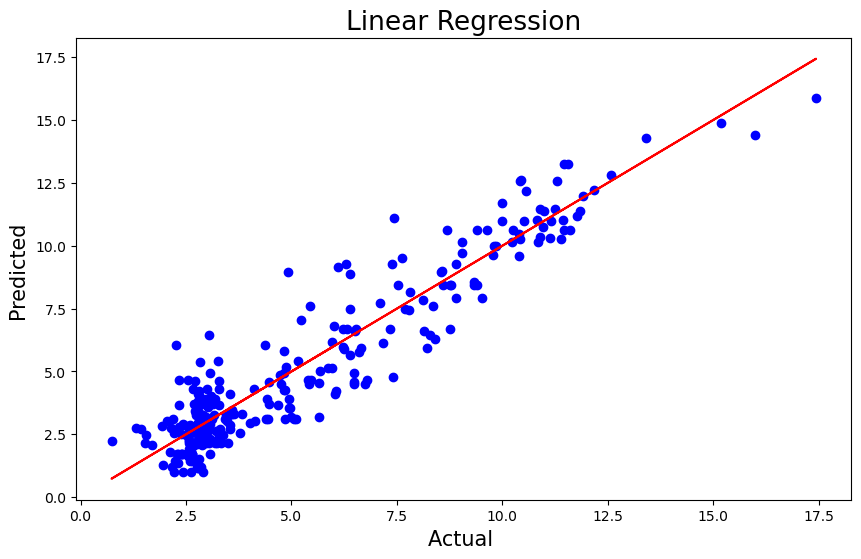

In [129]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_reg_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [130]:
RFR = RandomForestRegressor()
RFR.fit(x_reg_train,y_reg_train)
pred_RFR= RFR.predict(x_reg_test)
pred_train=RFR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_RFR)))

R2_score: 0.9094442040077316
R2_score on training Data: 97.64323166716825
Mean_Absolute_Error: 0.7478958789303062
Mean_Squared_Error: 1.0577126947846542
Root Mean Squared Error: 1.0284516006038662


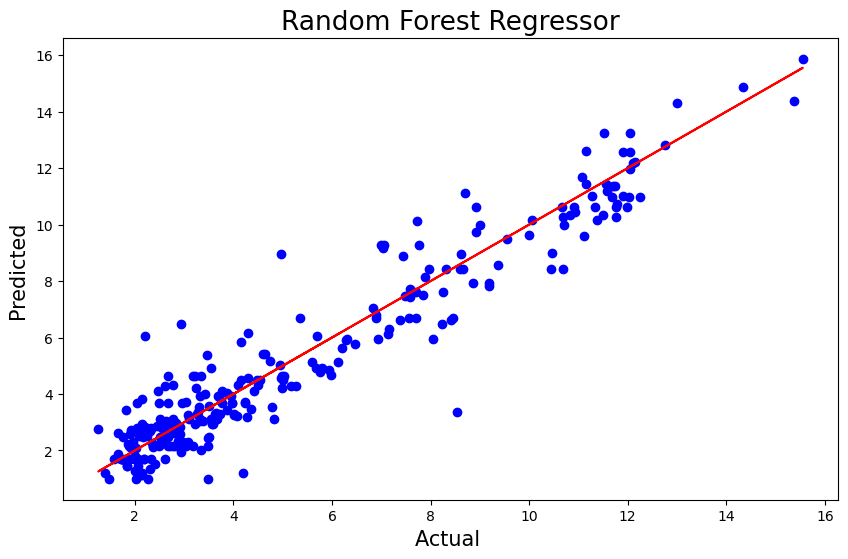

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_reg_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [132]:
knn = KNN()
knn.fit(x_reg_train,y_reg_train)
pred_knn= knn.predict(x_reg_test)
pred_train=knn.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_knn)))

R2_score: 0.8493981320422239
R2_score on training Data: 87.277778346258
Mean_Absolute_Error: 1.005620667400712
Mean_Squared_Error: 1.7590647385046723
Root Mean Squared Error: 1.3262973793628154


In [133]:
GBR=GradientBoostingRegressor()
GBR.fit(x_reg_train,y_reg_train)
pred_GBR= GBR.predict(x_reg_test)
pred_train=GBR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_GBR)))

R2_score: 0.8941569568475731
R2_score on training Data: 92.82075333853106
Mean_Absolute_Error: 0.7936979639589573
Mean_Squared_Error: 1.2362712863406373
Root Mean Squared Error: 1.111877370190003


In [134]:
lasso=Lasso()
lasso.fit(x_reg_train,y_reg_train)
pred_lasso= lasso.predict(x_reg_test)
pred_train=lasso.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_lasso)))

R2_score: 0.5839622077241978
R2_score on training Data: 46.5356759164018
Mean_Absolute_Error: 1.8328482401491348
Mean_Squared_Error: 4.859417882405542
Root Mean Squared Error: 2.204408737599618


In [135]:
rd=Ridge()
rd.fit(x_reg_train,y_reg_train)
pred_rd= rd.predict(x_reg_test)
pred_train=rd.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_rd)))

R2_score: 0.8840589484307629
R2_score on training Data: 80.86243523461897
Mean_Absolute_Error: 0.9175108437363495
Mean_Squared_Error: 1.3542183661213099
Root Mean Squared Error: 1.1637088837511338


In [136]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_reg_train,y_reg_train)
pred_DTR= dtr.predict(x_reg_test)
pred_train=dtr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_DTR)))

R2_score: 0.8002974776036009
R2_score on training Data: 99.94859054976861
Mean_Absolute_Error: 1.0372687890490753
Mean_Squared_Error: 2.3325717675456423
Root Mean Squared Error: 1.5272759303890187


In [137]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_reg_train,y_reg_train)
pred_SVR= svr.predict(x_reg_test)
pred_train=svr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_SVR)))

R2_score: 0.6161774299278127
R2_score on training Data: 39.752102626447716
Mean_Absolute_Error: 1.4847237906371464
Mean_Squared_Error: 4.483136617173429
Root Mean Squared Error: 2.117341875364824


# Cross Validation Score

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
score = cross_val_score(LR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_LR) - score.mean())*100)

[0.79561908 0.83148726 0.81299769 0.85433043 0.84602849]
0.8280925893823987
Difference between R2 score and cross validation score is : 5.52495184180819


In [140]:
score = cross_val_score(RFR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_RFR) - score.mean())*100)

[0.85726956 0.87632735 0.83106836 0.86719558 0.86814814]
0.8600017972048255
Difference between R2 score and cross validation score is : 4.944240680290612


In [141]:
score = cross_val_score(knn,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_knn) - score.mean())*100)

[0.80587026 0.82311007 0.78921668 0.8387596  0.86147169]
0.8236856614329641
Difference between R2 score and cross validation score is : 2.571247060925985


In [142]:
score = cross_val_score(GBR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_GBR) - score.mean())*100)

[0.84989212 0.86016787 0.83774741 0.84925353 0.87674801]
0.8547617852255813
Difference between R2 score and cross validation score is : 3.93951716219918


In [143]:
score = cross_val_score(lasso,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_lasso) - score.mean())*100)

[0.4999954  0.4489209  0.54224725 0.51959552 0.4674882 ]
0.49564945500281404
Difference between R2 score and cross validation score is : 8.831275272138377


In [144]:
score = cross_val_score(rd,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_rd) - score.mean())*100)

[0.79628419 0.83168278 0.81258345 0.85341087 0.8450421 ]
0.827800679287737
Difference between R2 score and cross validation score is : 5.625826914302589


In [145]:
score = cross_val_score(dtr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_DTR) - score.mean())*100)

[0.66417783 0.71207532 0.70140352 0.76001412 0.79032857]
0.7255998727948085
Difference between R2 score and cross validation score is : 7.4697604808792395


In [146]:
score = cross_val_score(svr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_SVR) - score.mean())*100)

[0.35896006 0.42736421 0.51225912 0.43710493 0.53875646]
0.4548889576269165
Difference between R2 score and cross validation score is : 16.128847230089615


KNeighborsRegressor(KNN) is our best model as the difference between R2 score and cross validation
score is : 2.571247060925985 and this is least out of all

finaly we observe that KNeighborsRegressor(KNN) is our best model

# Hyper Parameter Tuning

In [147]:
# KNeighborsRegressor(KNN)
from sklearn.model_selection import GridSearchCV



In [148]:
parameters={'n_neighbors':[5],
            'weights':['uniform','distance'],
            'leaf_size':[30],
            'p':[2],                   
            'algorithm':['auto','ball_tree']
            }

In [149]:
GCV=GridSearchCV(KNN(),parameters, cv =5)

In [150]:
GCV.fit(x_reg,y_reg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'n_neighbors': [5], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [151]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [152]:
Final_model1= KNN(algorithm = 'auto',leaf_size= 30,n_neighbors =5,p=2,weights= 'distance')
Final_model1.fit(x_reg_train,y_reg_train)
pred = Final_model1.predict(x_reg_test)
print('R2_score:',r2_score(y_reg_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred)))

R2_score: 0.861311719634135
Mean_Absolute_Error: 0.9816809868699791
Mean_Squared_Error: 1.6199112729720058
Root Mean Squared Error: 1.2727573503900913


# Saving the model

In [153]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model1,"Second_Phase_Evaluation_Projects1_Global_Power_Plant_capacity_mw_Prediction_Project_Analysis.pkl")

['Second_Phase_Evaluation_Projects1_Global_Power_Plant_capacity_mw_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [154]:
# first we load the saved model and get prediction
model1= joblib.load("Second_Phase_Evaluation_Projects1_Global_Power_Plant_capacity_mw_Prediction_Project_Analysis.pkl")

#prediction
prediction1 = model1.predict(x_reg_test)
prediction1

array([ 3.60263849,  9.06957514,  2.1483428 ,  3.23161824,  3.20329251,
        2.10828141,  4.8438549 ,  2.94514982,  2.92723243,  3.21265284,
        2.94302678,  2.23677118,  3.05592948,  5.02328906,  2.94126463,
        2.73356921, 13.1526533 ,  2.8670717 , 10.9614925 ,  4.66124871,
        2.66979943,  4.6040441 , 11.19520911, 11.11025616,  2.61932393,
        2.37564056,  5.59623303, 10.89384453,  6.63938783,  2.34220606,
        4.18921349, 11.81117653,  7.97731859, 13.52663074, 14.96130738,
        2.66961014,  2.91586563,  2.31243158, 11.63549561,  2.40058535,
        7.78724627,  6.5262216 ,  2.82382683, 11.81139829, 11.29845712,
       10.96601342,  5.35706839,  3.08557166,  9.09891314,  3.57081399,
       11.18293414,  3.93617736, 13.02335106, 12.04313786,  2.10977811,
       10.75028281,  3.17876426,  2.65143185,  9.46513677,  8.06877159,
        2.85380614,  4.94208874,  8.90660347, 11.15444278,  5.72562968,
       11.39554013,  4.25952077,  6.0585492 ,  8.41245173,  6.19

# these are the prediction for the number of capacity_mw

In [155]:
a1=np.array(y_reg_test)
df2 = pd.DataFrame()
df2["Predicted1"]  = prediction1
df2["Original1"] = a1
df2

,Predicted1,Original1
0,3.602638,4.932424
1,9.069575,6.463304
2,2.148343,2.884499
3,3.231618,2.943383
4,3.203293,2.154435
...,...,...
268,3.673733,5.371685
269,6.601102,8.434327
270,7.357101,6.694330
271,2.160747,2.237378


our findings
for classification problem

Random Forest Classifier is our best model as the difference between accuracy score and cross validation score is =0.042855119098212935 and this is least out of all

finaly we observe that Random Forest Classifier is our best model

for regression model

KNeighborsRegressor(KNN) is our best model as the difference between R2 score and cross validation
score is : 2.571247060925985 and this is least out of all

finaly we observe that KNeighborsRegressor(KNN) is our best model

as a primary fuel most of plant use coal and highest capacity mw plant produce high mw in 2019 